## Lesson-01

In [114]:
0. Can you come up out 3 sceneraies which use AI methods?
Ans: 自动驾驶，小爱同学，AI识别医疗图像诊断疾病

1. How do we use Github; Why do we use Jupyter and Pycharm;
Ans: Jupyter用于演示，Pycharm主要用于开发项目

2. What's the Probability Model?
Ans: 根据已有数据，计算各种情况的概率。当出现新数据，就根据这个概率，判断属于哪种。

3. Can you came up with some sceneraies at which we could use Probability Model?
Ans: 垃圾邮件，识别图片内容

4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?
Ans: 情况过多，多到无法逐一匹配。不断有新情况发生。

5. What's the Language Model;
Ans: 用于评价语言的质量优劣。

6. Can you came up with some sceneraies at which we could use Language Model?
Ans: 说出一条语音，识别出多条不同文字的句子，判断哪个字或同音字可能性更高。

7. What's the 1-gram language model;
Ans: 只根据句子中每个词单独出现概率的高低判断句子的质量。

8. What's the disadvantages and advantages of 1-gram language model;
Ans: 实现简单。缺点准确率不高，所有高频词组合在一起的文字质量最好。

9. What't the 2-gram models;
Ans: 根据句子中当前词和前一个字组合在一起的概率来判断句子的质量。

In [50]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [51]:
import random

In [52]:
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [53]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [54]:
adj_star()

''

## But the question is ? 

如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

In [55]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [56]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [57]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [58]:
example_grammar = create_grammar(simple_grammar)

In [59]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [60]:
generate(gram=example_grammar, target='sentence')

'一个蓝色的桌子坐在一个篮球'

In [31]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [32]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

女士,你好我是624682号,请问你要赌博吗？
你好我是12号,请问你要赌博吗？
女士,您好我是5号,请问你要喝酒吗？
女士,你好我是4号,请问你要打牌吗？
您好我是8486号,请问你要打猎吗？
你好我是5号,请问你要赌博吗？
您好我是4号,请问你要赌博吗？
小朋友,你好我是9号,您需要打牌吗？
你好我是3号,请问你要打猎吗？
你好我是8号,您需要喝酒吗？
您好我是5号,您需要喝酒吗？
小朋友,你好我是31号,您需要打牌吗？
你好我是98号,您需要打牌吗？
您好我是6号,请问你要喝酒吗？
先生,你好我是6号,请问你要打猎吗？
先生,您好我是5号,请问你要打牌吗？
先生,你好我是22号,请问你要赌博吗？
先生,您好我是5号,请问你要喝酒吗？
女士,你好我是7号,请问你要打牌吗？
小朋友,你好我是8号,请问你要赌博吗？


希望能够生成最合理的一句话？ 

## Data Driven

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [33]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [34]:
print(generate(gram=create_grammar(programming, split='=>'), target='stmt'))

databasename1=namestudent3


# Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

In [38]:
import random

In [39]:
random.choice(range(100))

71

In [9]:
import re
import jieba
import pandas as pd
from collections import Counter

In [6]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [7]:
articles=[]
read_index = 0
with open("E:/CloudStationBackup/PyCharm/NLP-ClassFile/nlpcourse/NLP/Lesson01/article_9k.txt", 'r', encoding='utf-8') as read_file:
    while True:
        read_index += 1
        if read_index > 1000:
            break
        if read_index % 1000 == 0:
            print("read insurance line:" + str(read_index))
        lines = read_file.readline()
        if not lines:
            break
        articles.append(lines.strip())

read insurance line:1000


In [10]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\13671\AppData\Local\Temp\jieba.cache
Loading model cost 1.186 seconds.
Prefix dict has been built succesfully.


In [11]:
with_jieba_cut.most_common()[:10]

[('的', 73),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('在', 10),
 ('自治区', 9),
 ('麦田', 8),
 ('队员', 8)]

In [12]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [13]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [14]:
len(articles_clean)

1000

In [15]:
def cut(string): return list(jieba.cut(string))

In [16]:
TOKEN = []

In [17]:
for i, line in enumerate(articles_clean):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 10000: break    
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900


In [18]:
from functools import reduce

In [19]:
from operator import add, mul

In [20]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [21]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

In [22]:
words_count = Counter(TOKEN)

In [23]:
words_count.most_common(100)

[('的', 23730),
 ('在', 6156),
 ('了', 5473),
 ('是', 3990),
 ('和', 3470),
 ('也', 2085),
 ('有', 2001),
 ('月', 1999),
 ('将', 1746),
 ('他', 1617),
 ('年', 1611),
 ('对', 1442),
 ('等', 1423),
 ('都', 1417),
 ('为', 1386),
 ('日', 1351),
 ('中', 1330),
 ('不', 1313),
 ('上', 1305),
 ('与', 1280),
 ('就', 1277),
 ('我', 1261),
 ('被', 1248),
 ('中国', 1236),
 ('6', 1229),
 ('到', 1171),
 ('人', 1092),
 ('这', 1068),
 ('但', 1051),
 ('一个', 984),
 ('后', 953),
 ('从', 951),
 ('还', 919),
 ('说', 911),
 ('并', 899),
 ('我们', 895),
 ('会', 843),
 ('而', 806),
 ('没有', 791),
 ('市场', 767),
 ('表示', 730),
 ('记者', 724),
 ('让', 716),
 ('进行', 685),
 ('要', 683),
 ('已经', 672),
 ('可以', 670),
 ('自己', 669),
 ('个', 655),
 ('他们', 644),
 ('时', 625),
 ('以', 622),
 ('发展', 620),
 ('下', 616),
 ('公司', 606),
 ('更', 567),
 ('5', 561),
 ('着', 557),
 ('你', 555),
 ('这个', 544),
 ('就是', 533),
 ('多', 521),
 ('能', 510),
 ('其', 507),
 ('目前', 505),
 ('可能', 504),
 ('企业', 485),
 ('3', 483),
 ('旅游', 483),
 ('通过', 481),
 ('她', 477),
 ('给', 472),
 ('时间', 471),

In [24]:
frequiences = [f for w, f in words_count.most_common(100)]

In [25]:
x = [i for i in range(100)]

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

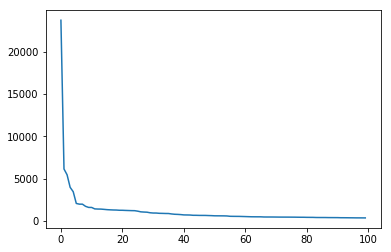

In [28]:
plt.plot(x, frequiences)

In [29]:
import numpy as np

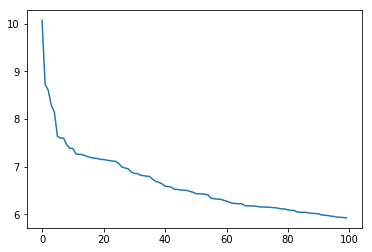

In [30]:
plt.plot(x, np.log(frequiences))

In [44]:
def prob_1(word):
    if word in words_count:
        return words_count[word] / len(TOKEN)
    else:
        return 1 / len(TOKEN)

In [32]:
prob_1('我们')

0.0020328250135143115

In [33]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [34]:
TOKEN = [str(t) for t in TOKEN]

In [35]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [36]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [37]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [38]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [39]:
prob_2('我们', '在')

5.224043318675728e-05

In [40]:
prob_2('在', '吃饭')

2.2713231820329252e-06

In [41]:
prob_2('去', '吃饭')

2.2713231820329252e-06

In [42]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)/prob_1(word)
        
        sentence_pro *= probability
    
    return sentence_pro

In [45]:
get_probablity('小明今天抽奖抽到一台苹果手机')

4.4480251581795646e-05

In [46]:
get_probablity('小明今天抽奖抽到一架波音飞机')

6.538262544542142e-05

In [47]:
get_probablity('洋葱奶昔来一杯')

0.0001268408964993657

In [48]:
get_probablity('养乐多绿来一杯')

1.0000090853133636

In [61]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个小猫听着这个小小的女人 with Prb: 3.033394163526869e-11
sentence: 这个好看的好看的篮球听着一个桌子 with Prb: 3.8611959701498887e-20
sentence: 一个蓝色的蓝色的小猫看见一个小小的蓝色的小小的小小的女人 with Prb: 2.516060177481663e-27
sentence: 这个小小的小猫坐在一个好看的蓝色的篮球 with Prb: 1.8907480237104385e-19
sentence: 一个女人看着一个好看的女人 with Prb: 1.793551193831072e-13
sentence: 这个蓝色的桌子坐在这个桌子 with Prb: 3.156074225036959e-14
sentence: 一个女人看见一个好看的小猫 with Prb: 9.565606367099051e-14
sentence: 这个小小的篮球听着一个小小的好看的好看的好看的小猫 with Prb: 1.394714152363843e-26
sentence: 一个篮球看着一个篮球 with Prb: 1.8985358171359094e-09
sentence: 这个好看的小猫看见一个小猫 with Prb: 5.62331050771742e-13


In [62]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.654710971979479e-18
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.1893235111102503e-17
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.271218773354816e-10
---- 真是一只好看的小猫 with probility 4.691077829239757e-08
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 2.8188349012133954e-06
---- 今晚火锅去吃我 with probility 6.120122171999668e-07
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 0.0001268408964993657
---- 养乐多绿来一杯 with probility 1.0000090853133636


## Data Driven